* **UJJWAL KUMAR - CS24RESCH11014**
* **Multimedia Content Analysis**

Aim - fine tuning vilt model

* Installing necessary requirements

In [ ]:
!pip install -r requirements.txt


In [ ]:
!pip install torch
!pip install -q transformers[torch]

* connect with google drive

In [ ]:
# self
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# root_folder=[ADD YOUR ROOT FOLDER HERE]
# self
root_folder = '/content/drive/MyDrive/DC_hand_annotated'

In [ ]:
import json

# # Opening JSON file
# f = open(root_folder + '/drivingcontexts_questions.json')  # /content/drive/MyDrive/DC_hand_annotated/drivingcontexts_questions.json
# # Return JSON object as dictionary
# data_questions = json.load(f)
# print(data_questions.keys())
# Open JSON file
f = open(root_folder + '/drivingcontexts_questions.json')  # Full path to JSON file


# Return JSON object as dictionary
data_questions = json.load(f)
questions = data_questions['questions']
print(data_questions.keys())

dict_keys(['questions'])


In [ ]:
questions = data_questions['questions']
print("Number of questions:", len(questions))

Number of questions: 35208


In [ ]:
#Visualize sample questions

print(questions[0])
print(questions[1])

{'image_id': 'pittsburgh/00000000.jpg', 'question': 'Are we driving indoors?', 'question_id': 'pittsburgh/00000000.jpg_0'}
{'image_id': 'pittsburgh/00000000.jpg', 'question': 'Are we driving outdoors?', 'question_id': 'pittsburgh/00000000.jpg_1'}


In [ ]:
import re
from typing import Optional

filename_re = re.compile(r".*(\d{12})\.((jpg)|(png))")

# source: https://github.com/allenai/allennlp-models/blob/a36aed540e605c4293c25f73d6674071ca9edfc3/allennlp_models/vision/dataset_readers/vqav2.py#L141
def id_from_filename(filename: str) -> Optional[int]:
    return filename

In [ ]:
from os import listdir
from os.path import isfile, join
from tqdm.auto import tqdm

# root at which all images are stored
root = root_folder +'/pittsburgh'   # /content/drive/MyDrive/DC_hand_annotated/pittsburgh
file_names = [f for f in tqdm(listdir(root)) if isfile(join(root, f))]
print(file_names)

  0%|          | 0/321 [00:00<?, ?it/s]

['20220302T162117.086929.jpg', '00000795.jpg', '20220302T161842.287312.jpg', '20211221T213312.709516.jpg', '20211221T213332.907955.jpg', '20211220T222133.343346.jpg', '20220302T161953.385404.jpg', '00000540.jpg', '20220302T162155.077722.jpg', '20211220T221929.335181.jpg', '20220302T161832.485194.jpg', '20220302T162015.684552.jpg', '20211221T213316.802911.jpg', '20211221T213036.699870.jpg', '20220302T162128.380380.jpg', '20211220T221917.844534.jpg', '20211220T221838.740796.jpg', '00000498.jpg', '20211221T213056.898399.jpg', '20211220T221926.749904.jpg', '00000714.jpg', '20211220T221857.735969.jpg', '20211220T221840.446316.jpg', '20211221T213053.289764.jpg', '20211221T213038.190467.jpg', '20220302T162045.954880.jpg', '00000483.jpg', '20211220T221919.945166.jpg', '20211220T221842.403179.jpg', 'pitt_2.jpg', '20211220T222136.503637.jpg', '20220302T162012.381175.jpg', 'pitt_1.jpg', '20211221T213314.002168.jpg', '00000750.jpg', '00000621.jpg', '00000711.jpg', '20211221T213334.002927.jpg', '20

pittsburgh/00000000.jpg


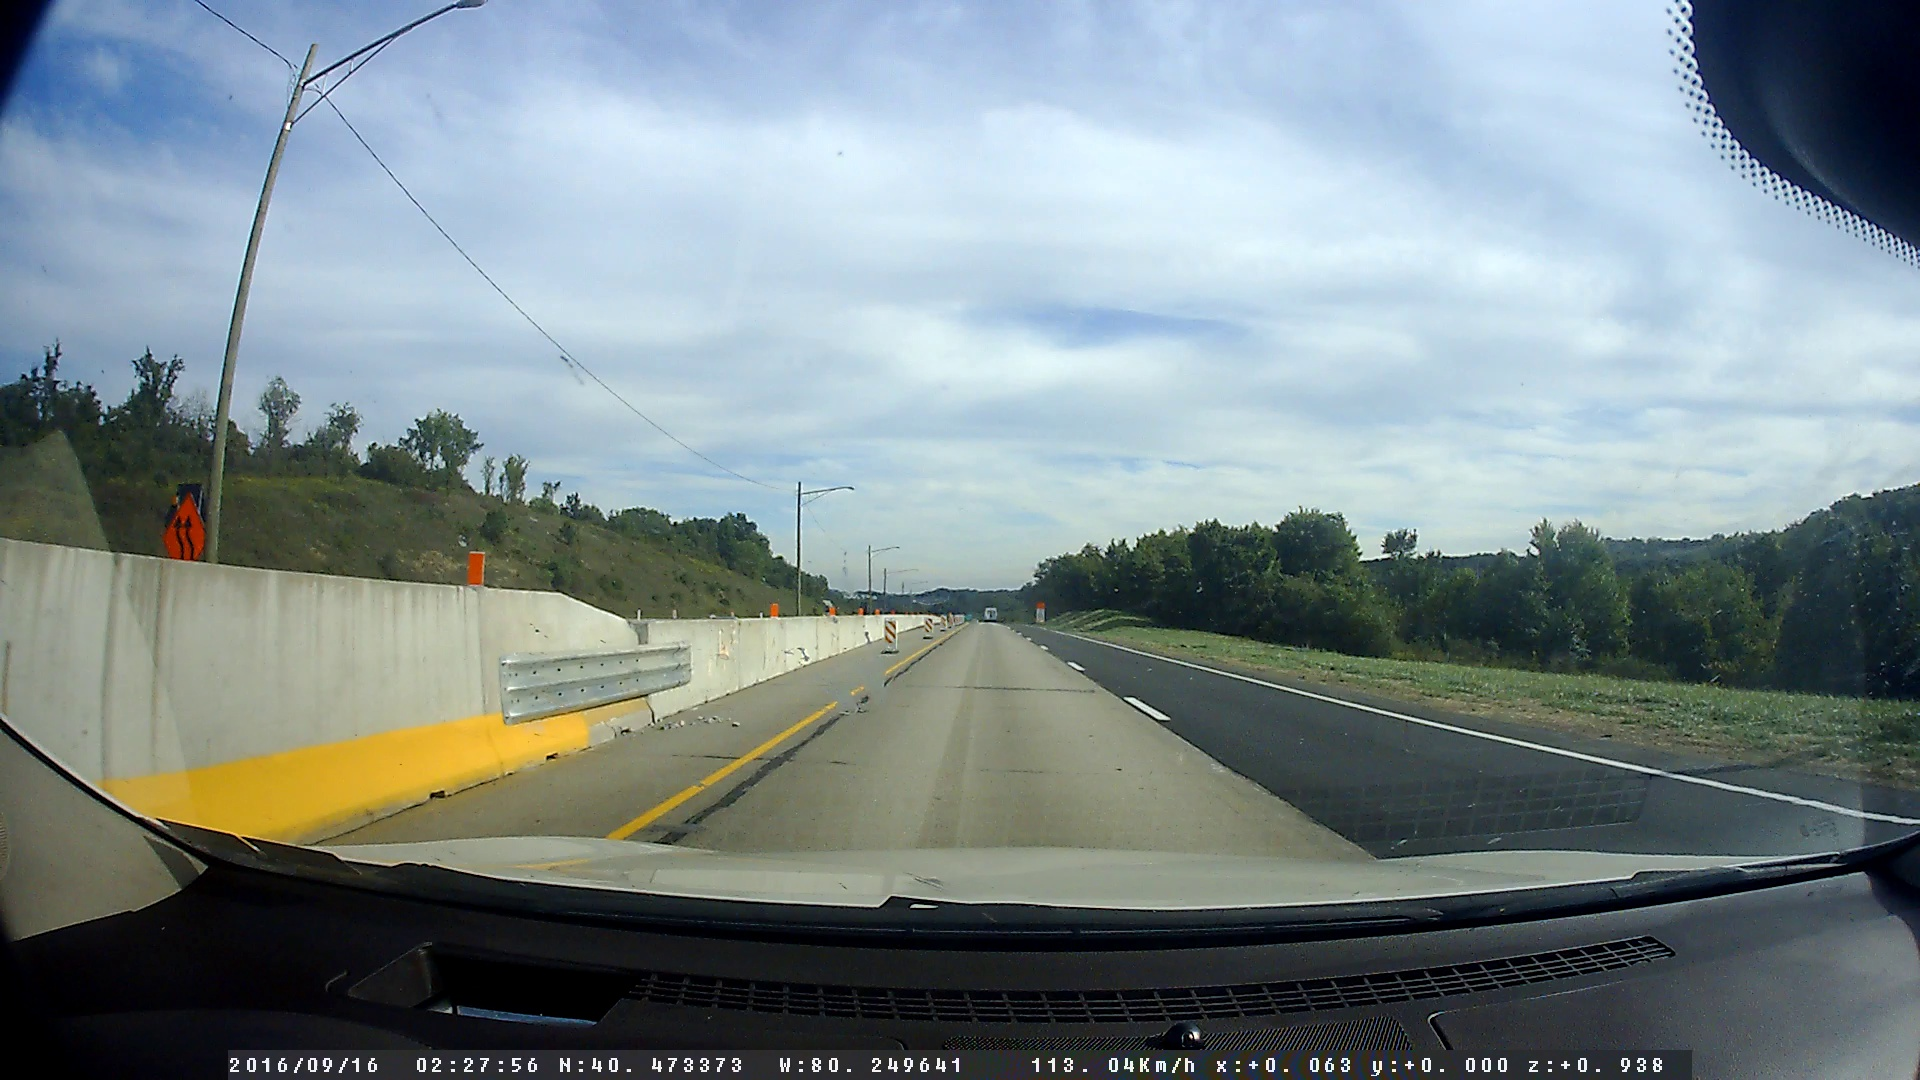

In [ ]:
from PIL import Image
print(questions[0]['image_id'])
path = root_folder + '/' + questions[0]['image_id']
image = Image.open(path).convert("RGB")
image

In [ ]:
import json

# Read annotations
f = open(root_folder +'/drivingcontexts_annotations.json')   #/content/drive/MyDrive/DC_hand_annotated/drivingcontexts_annotations.json

# Return JSON object as dictionary
data_annotations = json.load(f)
#print(data_annotations.keys())

In [ ]:
annotations = data_annotations['annotations']

In [ ]:
print("Number of annotations:", len(annotations))

Number of annotations: 35208


In [ ]:
annotations[0]

{'answer_type': 'yes/no',
 'multiple_choice_answer': 'no',
 'question_type': 'none of the above',
 'answers': [{'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 0},
  {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 1},
  {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 2},
  {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 3},
  {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 4},
  {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 5},
  {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 6},
  {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 7},
  {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 8},
  {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 9}],
 'image_id': 'pittsburgh/00000000.jpg',
 'question_id': 'pittsburgh/00000000.jpg_0'}

In [ ]:
from transformers import ViltConfig

config = ViltConfig.from_pretrained("dandelin/vilt-b32-finetuned-vqa")

/usr/local/lib/python3.11/dist-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings

config.json:   0%|          | 0.00/136k [00:00<?, ?B/s]

In [ ]:
from tqdm.notebook import tqdm

def get_score(count: int) -> float:
    return min(1.0, count / 3)

for annotation in tqdm(annotations):
    answers = annotation['answers']
    answer_count = {}
    for answer in answers:
        answer_ = answer["answer"]
        answer_count[answer_] = answer_count.get(answer_, 0) + 1
    labels = []
    scores = []
    for answer in answer_count:
        if answer not in list(config.label2id.keys()):
            continue
        labels.append(config.label2id[answer])
        score = get_score(answer_count[answer])
        scores.append(score)
    annotation['labels'] = labels
    annotation['scores'] = scores

  0%|          | 0/35208 [00:00<?, ?it/s]

Let's verify an example:

In [ ]:
annotations[0]

{'answer_type': 'yes/no',
 'multiple_choice_answer': 'no',
 'question_type': 'none of the above',
 'answers': [{'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 0},
  {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 1},
  {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 2},
  {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 3},
  {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 4},
  {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 5},
  {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 6},
  {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 7},
  {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 8},
  {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 9}],
 'image_id': 'pittsburgh/00000000.jpg',
 'question_id': 'pittsburgh/00000000.jpg_0',
 'labels': [9],
 'scores': [1.0]}

In [ ]:
labels = annotations[0]['labels']
print([config.id2label[label] for label in labels])

['no']


In [ ]:
scores = annotations[0]['scores']
print(scores)

[1.0]


In [ ]:
# self
import os
import torch
from PIL import Image

class VQADataset(torch.utils.data.Dataset):
    def __init__(self, questions, annotations, processor):
        self.questions = questions
        self.annotations = annotations
        self.processor = processor

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        # get image + text
        annotation = self.annotations[idx]
        questions = self.questions[idx]
        # Fix: Remove "/pittsburgh" and use root_folder directly
        # Since annotation['image_id'] likely already includes it
        image = Image.open(root_folder + "/" + annotation['image_id']).convert("RGB")
        text = questions['question']

        encoding = self.processor(image, text, padding="max_length", truncation=True, return_tensors="pt")
        # remove batch dimensionv
        for k,v in encoding.items():
          encoding[k] = v.squeeze()
        # add labels
        labels = annotation['labels']
        scores = annotation['scores']
        # based on: https://github.com/dandelin/ViLT/blob/762fd3975c180db6fc88f577cf39549983fa373a/vilt/modules/objectives.py#L301
        targets = torch.zeros(len(config.id2label))
        for label, score in zip(labels, scores):
              targets[label] = score
        encoding["labels"] = targets

        return encoding

In [ ]:
from transformers import ViltProcessor
import random

processor = ViltProcessor.from_pretrained("dandelin/vilt-b32-finetuned-vqa")
import numpy as np
indices=np.arange(len(questions))
old_questions = questions
old_annotations = annotations
temp = list(zip(questions, annotations,indices))
random.shuffle(temp)
res1, res2, res3 = zip(*temp)
questions, annotations, shuffled_indices = list(res1), list(res2), list(res3)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/251 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/320 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
from torch.utils.data import DataLoader

def collate_fn(batch):
  input_ids = [item['input_ids'] for item in batch]
  pixel_values = [item['pixel_values'] for item in batch]
  attention_mask = [item['attention_mask'] for item in batch]
  token_type_ids = [item['token_type_ids'] for item in batch]
  labels = [item['labels'] for item in batch]

  # create padded pixel values and corresponding pixel mask
  encoding = processor.image_processor.pad(pixel_values, return_tensors="pt")

  # create new batch
  batch = {}
  batch['input_ids'] = torch.stack(input_ids)
  batch['attention_mask'] = torch.stack(attention_mask)
  batch['token_type_ids'] = torch.stack(token_type_ids)
  batch['pixel_values'] = encoding['pixel_values']
  batch['pixel_mask'] = encoding['pixel_mask']
  batch['labels'] = torch.stack(labels)

  return batch



In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Mon Jan 27 13:17:38 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0              46W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 89.6 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
# Freeing memory after each shot
torch.cuda.empty_cache()

In [ ]:
data_split = 0.7
from transformers import ViltForQuestionAnswering
import gc  # Import the garbage collector

# Reduce batch size further to minimize memory usage
batch_size = 4  # Or even smaller if necessary

for shots in [1*24,4*24,16*24,int(data_split*len(questions))]:
    # Create the dataset within the loop to avoid keeping previous data in memory
    dataset = VQADataset(questions=questions[:shots],
                    annotations=annotations[:shots],
                    processor=processor)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model = ViltForQuestionAnswering.from_pretrained("dandelin/vilt-b32-finetuned-vqa",
                                                    id2label=config.id2label,
                                                    label2id=config.label2id)

    # Avoid using DataParallel, it can increase memory usage unnecessarily
    # model = torch.nn.DataParallel(model)

    model.to(device)

    # DataLoader with reduced batch size
    train_dataloader = DataLoader(dataset, collate_fn=collate_fn, batch_size=batch_size, shuffle=False)

    optimizer = torch.optim.AdamW(model.parameters(), lr=5e-4)
    from tqdm import tqdm
    num_epochs=5
    model.train()
    for epoch in tqdm(range(num_epochs)):
        # Initialize loss before the inner loop to None to fix NameError
        # This ensures loss has a value even if the inner loop doesn't run
        loss = None
        for batch in tqdm(train_dataloader):
            # get the inputs;
            batch = {k:v.to(device) for k,v in batch.items()}

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(**batch)
            loss = outputs.loss #  Assign value to loss
            loss.sum().backward()
            optimizer.step()

            # Delete unnecessary variables and free memory using garbage collector
            del batch, outputs
            gc.collect()
            torch.cuda.empty_cache()

    os.makedirs('models_vilt', exist_ok=True)
    torch.save({'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss}, # Now loss is defined in this scope
            'models_vilt/model_'+str(int(shots/24))+'shot'+'.pth')

    # Delete the model and dataset after each shot to free up memory
    del model, dataset
    gc.collect()
    torch.cuda.empty_cache()

/usr/local/lib/python3.11/dist-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.11/dist-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/470M [00:00<?, ?B/s]

Streaming output truncated to the last 5000 lines.
100%|██████████| 1/1 [1:16:16<00:00, 4576.72s/it]


In [ ]:
eval_dataset = VQADataset(questions=questions[int(data_split*len(questions)):],
                     annotations=annotations[int(data_split*len(questions)):],
                     processor=processor)

In [ ]:
print(questions[0])
print(annotations[0])

{'image_id': 'web/web_10_34.jpg', 'question': 'Are the lane markers clearly visible?', 'question_id': 'web/web_10_34.jpg_18'}
{'answer_type': 'yes/no', 'multiple_choice_answer': 'no', 'question_type': 'none of the above', 'answers': [{'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 0}, {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 1}, {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 2}, {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 3}, {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 4}, {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 5}, {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 6}, {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 7}, {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 8}, {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 9}], 'image_id': 'web/web_10_34.jpg', 'question_id': 'web/web_10_34.jpg_18', 'labels': [3], 'scores': [1.0]}


In [ ]:
binary_predictions = list(map(lambda x: 1 if x == "yes" else (0 if x == "no" else -1), predicted_answers))
binary_annotations = list(map(lambda x: 1 if x == "yes" else (0 if x == "no" else -1),
 annotated_answers))

tp_count=sum([1 for i in range(len(binary_predictions)) if binary_predictions[i]==1 and binary_annotations[i]==1])
tn_count=sum([1 for i in range(len(binary_predictions)) if binary_predictions[i]==0 and binary_annotations[i]==0])
fp_count=sum([1 for i in range(len(binary_predictions)) if binary_predictions[i]==1 and binary_annotations[i]==0])
fn_count=sum([1 for i in range(len(binary_predictions)) if binary_predictions[i]==0 and binary_annotations[i]==1])

print("Precision: ", tp_count/(tp_count+fp_count) if (tp_count+fp_count) != 0 else 0)
print("Recall: ", tp_count/(tp_count+fn_count) if (tp_count+fn_count) != 0 else 0)
print("F1 score: ", 2*tp_count/(2*tp_count+fp_count+fn_count) if (2*tp_count+fp_count+fn_count) != 0 else 0)
print("Accuracy: ", (tp_count+tn_count)/(tp_count+tn_count+fp_count+fn_count))

Precision:  0.7922077922077922
Recall:     0.8243243243243243
F1 score:   0.8079470198675497
Accuracy:   0.8897338403041825
